In [76]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA

from sklearn.linear_model import LogisticRegression

from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC # "Support vector classifier"

# Load in various data info from mat file

In [2]:
#data_filename = "data/EEG/EEG_session1_sub1_multigrasp_realMove.mat"
data_filename = "/Volumes/Seagate/EEG/EEG_session1_sub1_multigrasp_realMove.mat"
data = sio.loadmat(data_filename)

In [3]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])


In [4]:
grasp_labels = data['mrk']['y'][0][0]
grasp_labels = grasp_labels.T
print(grasp_labels)

[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]]


In [5]:
tmp_grasp_names = data['mrk']['className'][0][0][0]
grasp_names = []
for n in tmp_grasp_names:
    grasp_names.append(n[0])
print(grasp_names)

['Cylindrical', 'Spherical', 'Lumbrical', 'Rest']


In [6]:
event_times = data['mrk']['pos'][0][0][0]
print(event_times)

[  54152   64265   79397   89491  104656  114721  129814  139876  154989
  165060  180166  190235  205335  215408  230528  240599  255707  265779
  280885  290964  306085  316168  331270  341344  356453  366535  381646
  391746  406873  416963  432078  442165  457284  467371  482478  492571
  507695  517784  532918  543004  558147  568246  583352  593440  608556
  618643  633764  643843  658931  668978  684090  694177  709286  719370
  734499  744611  759726  769817  784952  795043  810153  820243  835355
  845436  860571  870687  885809  895906  911042  921124  936239  946322
  961463  971577  986694  996791 1011910 1021998 1037132 1047230 1062374
 1072472 1087617 1097710 1112854 1122938 1138065 1148160 1163288 1173390
 1188521 1198640 1213787 1223886 1239019 1249143 1264285 1274399 1289537
 1299631 1314790 1324885 1340031 1350136 1365269 1375387 1390544 1400646
 1415802 1425893 1441027 1451118 1466252 1476368 1491523 1501610 1516740
 1526867 1542008 1552110 1567239 1577338 1592469 16

In [7]:
eeg_fs = data['mrk']['fs'][0][0][0][0]
print(eeg_fs)

2500


In [8]:
num_chans = data['mnt']['x'][0][0].shape[0]
print(num_chans)

time_samples = data['ch1'].shape[0]
print(time_samples)

eeg_data = np.zeros( (num_chans, time_samples) )
for chan in range(num_chans):
    eeg_data[chan] = np.squeeze(data['ch'+str(chan+1)])

print(eeg_data.shape)

60
3854800
(60, 3854800)


# Creating Epochs

In [9]:
seconds = 1
epoched_eeg = np.zeros( (len(event_times), num_chans, seconds*eeg_fs) )

for i, et in enumerate(event_times):
    # print(e)
    epoched_eeg[i,:,:] = eeg_data[:,et:et+(1*eeg_fs)]

In [10]:
epoched_eeg.shape

(300, 60, 2500)

In [11]:
grasp_labels.shape

(300, 4)

# Making sure things look reasonable

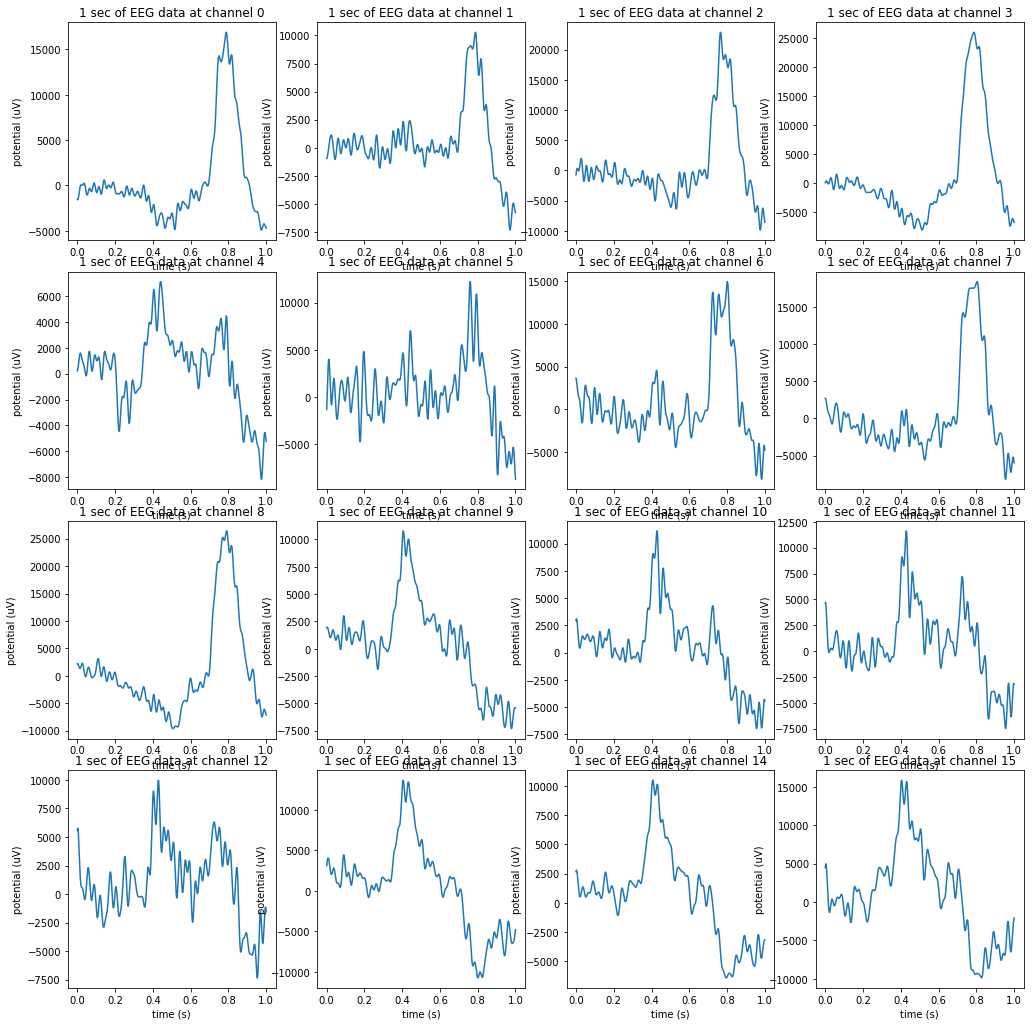

In [12]:
# plot for 10 seconds of data
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(14, 14)
fig.tight_layout()

elec = 0
for i in range(4):
    for j in range(4):
    # plt.figure(figsize=[10,4])
        axes[i, j].plot(np.linspace(0,1,eeg_fs*1),epoched_eeg[4,elec,0:eeg_fs*1])
        axes[i, j].set_xlabel('time (s)')
        axes[i, j].set_ylabel('potential (uV)')
        axes[i, j].set_title('1 sec of EEG data at channel ' + str(elec))
        elec += 1

Might be worth making sure that all event timings are within 1 second of each other for the window

In [13]:
elec = 0
dataset = epoched_eeg[:,elec,:]
dataset.shape

(300, 2500)

In [14]:
eeg_total = np.reshape(epoched_eeg, (300, 60*2500))

In [15]:
def standardize(dataset):
    
    data_norm = StandardScaler().fit_transform(dataset) # normalizing the features
    return data_norm

In [16]:
data_norm = standardize(dataset)

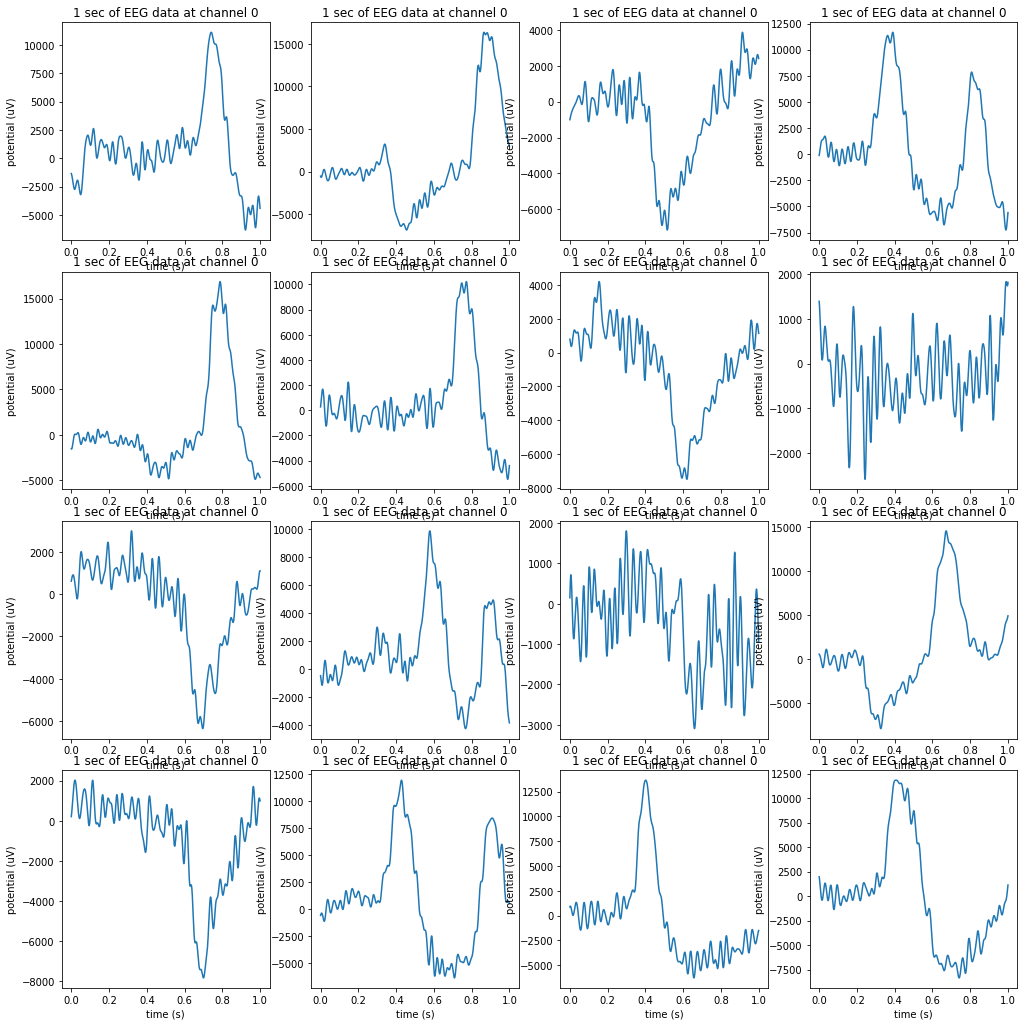

In [17]:
# plot for 10 seconds of data
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(14, 14)
fig.tight_layout()

#non-standardized data for electrode = 0
sample = 0
for i in range(4):
    for j in range(4):
    # plt.figure(figsize=[10,4])
        axes[i, j].plot(np.linspace(0,1,eeg_fs*1),epoched_eeg[sample,elec,0:eeg_fs*1])
        axes[i, j].set_xlabel('time (s)')
        axes[i, j].set_ylabel('potential (uV)')
        axes[i, j].set_title('1 sec of EEG data at channel ' + str(elec))
        sample += 1

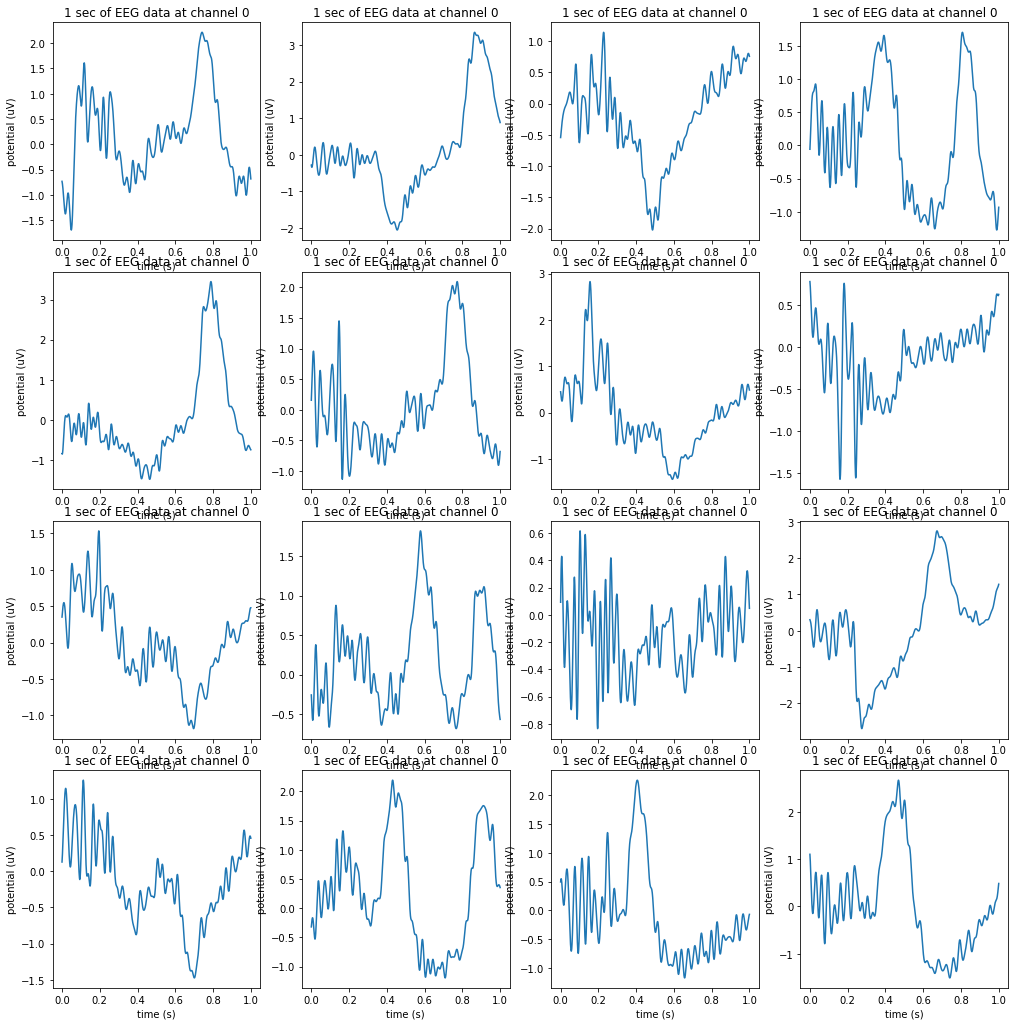

In [18]:
# plot for 10 seconds of data
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(14, 14)
fig.tight_layout()

#standardized data for electrode = 0
sample = 0
for i in range(4):
    for j in range(4):
    # plt.figure(figsize=[10,4])
        axes[i, j].plot(np.linspace(0,1,eeg_fs*1),data_norm[sample, 0:eeg_fs*1])
        axes[i, j].set_xlabel('time (s)')
        axes[i, j].set_ylabel('potential (uV)')
        axes[i, j].set_title('1 sec of EEG data at channel ' + str(elec))
        sample += 1

In [19]:
def PCA_fn(dataset):
    
    pca_eeg = PCA(svd_solver="full")
    pca_data_eeg = pca_eeg.fit_transform(dataset)
    return pca_data_eeg, pca_eeg

In [20]:
def tSNE_fn(dataset):
    
    dataset_embedded = TSNE(n_components=2,
                   init='random').fit_transform(dataset)
    
    return dataset_embedded

In [21]:
def PCA_AllElec(e_eeg):
    
    data_reduced_PCA = {}
    dim_arr = []
    
    for elec in range(60):
        dataset = e_eeg[:,elec,:]
        data_norm = standardize(dataset)
        
        pca_mx, pca_results = PCA_fn(data_norm)
            
        l1 = pca_results.explained_variance_ratio_[0]
        dim = np.where(pca_results.explained_variance_ratio_<l1/10)[0][0] 
        
        data_reduced_PCA[str(elec)] = pca_mx[:,0:dim]
        dim_arr.append(dim)
        
    return data_reduced_PCA, dim_arr

In [22]:
def tSNE_AllElec(e_eeg):
    
    data_reduced_tSNE = {}
    
    for elec in range(60):
        print(elec)
        dataset = e_eeg[:,elec,:]
        data_norm = standardize(dataset)
        
        tSNE_mx = tSNE_fn(data_norm)
        
        data_reduced_tSNE[str(elec)] = tSNE_mx
        
    return data_reduced_tSNE

In [23]:
indices = {}
labels = np.zeros(len(grasp_labels))
for i in range(4):
    indices[str(i)] = np.where(grasp_labels[:,i]==1)
    labels[indices[str(i)]] = i+1

In [ ]:
pca_mx, pca_results = PCA_fn(data_norm)

In [ ]:
plt.plot(pca_results.explained_variance_ratio_, "-*")

In [ ]:
print(pca_results.explained_variance_ratio_[:20]) #11 PCs?
print(data_norm.shape)
print(pca_mx.shape)

In [ ]:
epoched_eeg_PCA, dim_arr = PCA_AllElec(epoched_eeg)

In [ ]:
electrode = 1

plt.plot(epoched_eeg_PCA[str(electrode)][indices["0"],0], epoched_eeg_PCA[str(electrode)][indices["0"],1], "*")
plt.plot(epoched_eeg_PCA[str(electrode)][indices["1"],0], epoched_eeg_PCA[str(electrode)][indices["1"],1], "*")
plt.plot(epoched_eeg_PCA[str(electrode)][indices["2"],0], epoched_eeg_PCA[str(electrode)][indices["2"],1], "*")
plt.plot(epoched_eeg_PCA[str(electrode)][indices["3"],0], epoched_eeg_PCA[str(electrode)][indices["3"],1], "*")
plt.xlabel("PC1")
plt.xlabel("PC2")

In [24]:
classifier = LogisticRegression(solver='lbfgs',random_state=0, max_iter=1000)
classifier2 = SVC(kernel = 'linear')

In [ ]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))

acc_pca = np.zeros((60))
for electrode in range(60):
    print(electrode)
    classifier.fit(epoched_eeg_PCA[str(electrode)][ind_train,:], labels[ind_train])
    predicted_labels = classifier.predict(epoched_eeg_PCA[str(electrode)][ind_test,:])

    acc_pca[electrode] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

In [ ]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))

acc_simple = np.zeros((60))
for electrode in range(60):
    print(electrode)
    classifier.fit(epoched_eeg[ind_train, electrode,:], labels[ind_train])
    predicted_labels = classifier.predict(epoched_eeg[ind_test, electrode,:])

    acc_simple[electrode] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

In [ ]:
plt.plot(acc_simple, acc_pca, "*")
plt.plot(range(25,65), range(25,65))
plt.xlabel("acc without PCA")
plt.ylabel("acc with PCA")

In [ ]:
epoched_eeg_PCA[str(electrode)][ind_train,:].shape
grasp_labels[ind_train].shape

In [29]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))

classifier.fit(eeg_total[ind_train, :], labels[ind_train])
predicted_labels = classifier.predict(eeg_total[ind_test, :])

print(100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


70.0


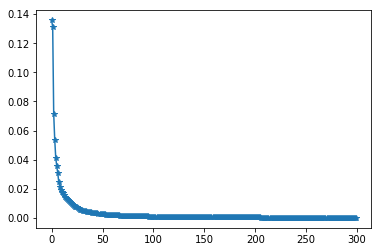

In [30]:
eeg_total_norm = standardize(eeg_total)
pca_mx, pca_results = PCA_fn(eeg_total_norm)

plt.plot(pca_results.explained_variance_ratio_, "-*")

l1 = pca_results.explained_variance_ratio_[0]
dim = np.where(pca_results.explained_variance_ratio_<l1/10)[0][0] 

In [ ]:
eegT_reduced_PCA = pca_mx[:,0:12]

In [ ]:
dim

In [ ]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))

acc_pca_total = np.zeros(300)
for d in range(1,300):
    print(d)
    eegT_reduced_PCA = pca_mx[:,:d]
    classifier.fit(eegT_reduced_PCA[ind_train, :], labels[ind_train])
    predicted_labels = classifier.predict(eegT_reduced_PCA[ind_test, :])

    acc_pca_total[d] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

In [ ]:
plt.plot(range(300), acc_pca_total)
plt.xlabel("dimensionality (PC dim)")
plt.ylabel("accuracy")

In [ ]:
max(acc_pca_total)

In [ ]:
epoched_eeg.shape

In [26]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))


classifier2.fit(eeg_total[ind_train, :], labels[ind_train])
predicted_labels = classifier2.predict(eeg_total[ind_test, :])

print(100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test))

65.0


In [ ]:
acc_pca_total = np.zeros(300)
for d in range(1,50):
    print(d)
    eegT_reduced_PCA = pca_mx[:,:d]
    classifier2.fit(eegT_reduced_PCA[ind_train, :], labels[ind_train])
    predicted_labels = classifier2.predict(eegT_reduced_PCA[ind_test, :])

    acc_pca_total[d] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

In [71]:
acc = np.zeros((140))
for d in range(10,150):
    print(d)
    eegT_reduced_PCA = pca_mx[:,0:d]
    classifier2.fit(eegT_reduced_PCA[ind_train, :], labels[ind_train])
    predicted_labels = classifier2.predict(eegT_reduced_PCA[ind_test, :])

    acc[d-10] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


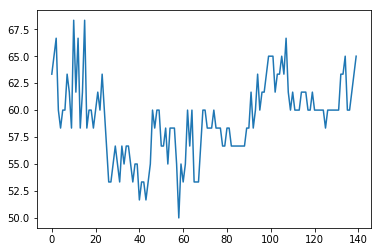

In [72]:
plt.plot(acc)

In [75]:
max(acc)

68.33333333333333

In [73]:
m = max(acc)

In [90]:
acc = np.zeros((5))
for d in range(15,20):
    print(d)
    eegT_reduced_PCA = pca_mx[:,0:d]
    classifier2.fit(eegT_reduced_PCA[ind_train, :], labels[ind_train])
    predicted_labels = classifier2.predict(eegT_reduced_PCA[ind_test, :])

    acc[d-15] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

15
16
17
18
19


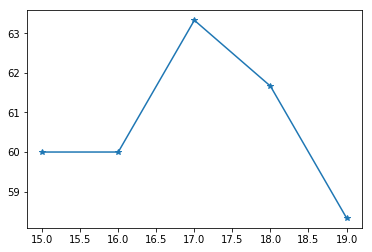

In [91]:
plt.plot(np.arange(15,20), acc, "-*")

In [92]:
predicted_labels

array([1., 4., 3., 4., 3., 4., 3., 2., 4., 1., 1., 4., 3., 4., 2., 4., 3.,
       4., 1., 4., 1., 3., 3., 4., 4., 4., 3., 4., 2., 4., 2., 1., 1., 4.,
       4., 4., 2., 4., 3., 4., 1., 4., 4., 4., 4., 4., 2., 4., 4., 1., 4.,
       2., 3., 4., 1., 4., 1., 4., 1., 3.])

In [ ]:
epoched_eeg_tSNE = tSNE_AllElec(epoched_eeg)

In [ ]:
epoched_eeg_tSNE["0"].shape

In [ ]:
plt.plot(epoched_eeg_tSNE["0"][:,0], epoched_eeg_tSNE["0"][:,1], "*")

In [ ]:
electrode = 10

plt.plot(epoched_eeg_tSNE[str(electrode)][indices["0"],0][0], epoched_eeg_tSNE[str(electrode)][indices["0"],1][0], "b*")
plt.plot(epoched_eeg_tSNE[str(electrode)][indices["1"],0][0], epoched_eeg_tSNE[str(electrode)][indices["1"],1][0], "r*")
plt.plot(epoched_eeg_tSNE[str(electrode)][indices["2"],0][0], epoched_eeg_tSNE[str(electrode)][indices["2"],1][0], "g*")
plt.plot(epoched_eeg_tSNE[str(electrode)][indices["3"],0][0], epoched_eeg_tSNE[str(electrode)][indices["3"],1][0], "y*")


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(epoched_eeg_tSNE[str(electrode)][indices["0"],0][0], epoched_eeg_tSNE[str(electrode)][indices["0"],1][0], epoched_eeg_tSNE[str(electrode)][indices["0"],2][0], "b*")
ax.plot(epoched_eeg_tSNE[str(electrode)][indices["1"],0][0], epoched_eeg_tSNE[str(electrode)][indices["1"],1][0], epoched_eeg_tSNE[str(electrode)][indices["1"],2][0], "r*")
ax.plot(epoched_eeg_tSNE[str(electrode)][indices["2"],0][0], epoched_eeg_tSNE[str(electrode)][indices["2"],1][0], epoched_eeg_tSNE[str(electrode)][indices["2"],2][0], "g*")
ax.plot(epoched_eeg_tSNE[str(electrode)][indices["3"],0][0], epoched_eeg_tSNE[str(electrode)][indices["3"],1][0], epoched_eeg_tSNE[str(electrode)][indices["3"],2][0], "y*")

In [ ]:
ind_train = np.array(range(int(0.8*len(grasp_labels))))
ind_test = np.array(range(int(0.8*len(grasp_labels)), len(grasp_labels)))

acc_tSNE = np.zeros((60))
for electrode in range(60):
    print(electrode)
    classifier.fit(epoched_eeg_tSNE[str(electrode)][ind_train,:], labels[ind_train])
    predicted_labels = classifier.predict(epoched_eeg_tSNE[str(electrode)][ind_test,:])

    acc_tSNE[electrode] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

In [ ]:
plt.plot(acc_simple, acc_tSNE, "*")
plt.plot(range(25,65), range(25,65))
plt.xlabel("acc without tSNE")
plt.ylabel("acc with tSNE")

In [84]:
transformer = FastICA()
eeg_total_ica = transformer.fit_transform(eeg_total_norm)

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [85]:
acc = np.zeros((299))
for d in range(1,300):
    print(d)
    eegT_reduced_ICA = eeg_total_ica[:,0:d]
    classifier.fit(eegT_reduced_ICA[ind_train, :], labels[ind_train])
    predicted_labels = classifier.predict(eegT_reduced_ICA[ind_test, :])

    acc[d-1] = 100. * np.sum(predicted_labels == labels[ind_test])/len(ind_test)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

76
77
78
79
80
81
82
83
84
85
86
87
88
89


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

90
91
92
93
94
95
96
97
98
99
100
101
102
103


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

104
105
106
107
108
109
110
111
112
113
114
115
116


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

117
118
119
120
121
122
123
124
125
126
127
128
129


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

130
131
132
133
134
135
136
137
138
139
140
141
142


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

143
144
145
146
147
148
149
150
151
152
153
154
155
156


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

157
158
159
160
161
162
163
164
165
166
167
168
169
170
171


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

172
173
174
175
176
177
178
179
180
181
182
183
184
185


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

186
187
188
189
190
191
192
193
194
195
196
197


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

198
199
200
201
202
203
204
205
206
207
208
209


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

210
211
212
213
214
215
216
217
218
219
220
221


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

222
223
224
225
226
227
228
229
230
231
232
233


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

234
235
236
237
238
239
240
241
242
243
244
245


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

246
247
248
249
250
251
252
253
254
255
256
257


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

258
259
260
261
262
263
264
265
266
267
268


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

269
270
271
272
273
274
275
276
277
278
279


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

280
281
282
283
284
285
286
287
288
289
290
291


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

292
293
294
295
296
297
298
299


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linea

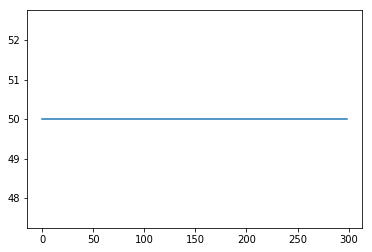

In [86]:
plt.plot(acc)

In [89]:
eeg_total_norm

array([[-0.73351044, -0.74093708, -0.74926465, ...,  0.87053779,
         0.86137331,  0.85095352],
       [-0.28307394, -0.29819878, -0.31043753, ..., -0.71511029,
        -0.73112438, -0.74744167],
       [-0.54417255, -0.53060878, -0.51743145, ..., -0.66494603,
        -0.65679258, -0.64748072],
       ...,
       [ 0.6735516 ,  0.70596701,  0.73777971, ...,  0.63981488,
         0.64229869,  0.64433489],
       [-0.25547367, -0.24189042, -0.22653599, ..., -1.03978905,
        -1.05753086, -1.07639812],
       [-0.25768169, -0.24961902, -0.2397836 , ..., -0.55971547,
        -0.54733695, -0.53428964]])